In [42]:
# Imports
import random
import networkx as nx
import matplotlib.pyplot as plt

In [43]:
def draw_graph(edges=None, cordinates=None, adj_list=None):
    G = nx.DiGraph()
    if adj_list:
        G.add_nodes_from(adj_list.keys())
        for k, v in adj_list.items():
            G.add_edges_from(([(k, t) for t in v]))
        nx.draw(G, with_labels=True)
        plt.show()
    else:
        G.add_nodes_from(cordinates.keys())
        nx.set_node_attributes(G, cordinates, 'pos')
        adjacency_list = {}
        for u, v in edges:
            adjacency_list.setdefault(u, []).append(v)
            adjacency_list.setdefault(v, []).append(u)
        for k, v in adjacency_list.items():
            G.add_edges_from(([(k, t) for t in v]))
        _, ax = plt.subplots(figsize=(10, 5))
        nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), with_labels=True, ax=ax)
        ax.set_axis_on()
        ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)


In [51]:
import math

class Vertex:
    def __init__(self, key, x, y):
        self.key = key
        self.x = x
        self.y = y
        self.d = float('-inf')  # Distance from source
        self.h = None  # Heuristic distance to destination
        self.pi = None
        self.pi_set = set()
        self.priority = 0
        self.parent = None

    def __lt__(self, other):
        return self.priority < other.priority

    def __gt__(self, other):
        return self.priority > other.priority
    

class Graph:
    def __init__(self):
        self.vertices = {}
        self.adjacency_list = {}

    def add_vertex(self, key, x, y):
        if key not in self.vertices:
            self.vertices[key] = Vertex(key, x, y)
            self.adjacency_list[key] = []

    def add_edge(self, u, v):
        if u in self.vertices and v in self.vertices:
            self.adjacency_list[u].append(v)
            self.adjacency_list[v].append(u)  # For undirected graph

    def get_adjacency_list(self, vertex_key):
        if vertex_key in self.vertices:
            return self.adjacency_list[vertex_key]
        else:
            return []

    def generate_geometric_graph(self, n, r):

        for key in range(n):
            self.add_vertex(key,random.uniform(0, 1), random.uniform(0, 1))

        for u in self.vertices:
            for v in self.vertices:
                if u != v and euclidean_distance(self.vertices[u], self.vertices[v]) <= r:
                    self.adjacency_list[u].append(v)
                    self.adjacency_list[v].append(u)


def euclidean_distance(v1, v2):
    return math.sqrt(((v1.x - v2.x) ** 2) + ((v1.y - v2.y) ** 2))

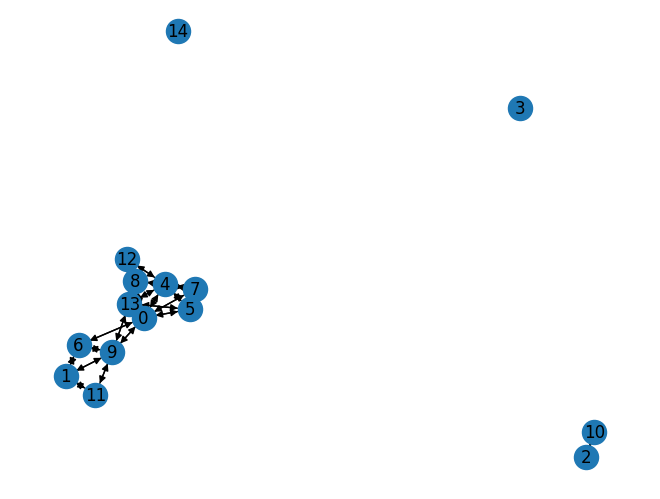

In [52]:

# Generate a random geometric graph
n = 15  # Number of vertices
r = 0.3  # Maximum distance for edge creation
graph = Graph()
graph.generate_geometric_graph(n, r)
draw_graph(adj_list=graph.adjacency_list)


In [53]:
import heapq

def initialize_single_source_max(graph, source, destination):
    for vertex in graph.vertices.values():
        vertex.d = float('-inf')
        vertex.h = euclidean_distance(vertex, destination)
        vertex.pi = None
        vertex.pi_set = set()

    source.d = 0

def relax_max(u, v):
    if v.d < (u.d + 1):
        v.d = u.d + 1
        v.pi = u
        return True
    return False

def a_star_max(graph, source, destination):
    initialize_single_source_max(graph, source, destination)
    S = set()  # Closed list
    Q = []  # Max heap
    for vertex in graph.vertices.values():
        vertex.priority = vertex.d + vertex.h
        heapq.heappush(Q, vertex)
    heapq._heapify_max(Q)

    while Q:
        u = heapq._heappop_max(Q)
        S.add(u)

        for v in graph.get_adjacency_list(u.key):
            v = graph.vertices[v]
            if v in u.pi_set:
                continue
            if relax_max(u, v):
                v.pi_set = u.pi_set | {u}
                if v in S:
                    S.remove(v)
                    heapq.heappush(Q, vertex)
                    heapq._heapify_max(Q)
                else:
                    v.priority = v.d + v.h
                    heapq._heapify_max(Q)

final_path = []

for i in range(0, len(graph.vertices)):
    for j in range(0, len(graph.vertices)):
        if i!=j:
            s = graph.vertices[i]
            d = graph.vertices[j]
            a_star_max(graph, s, d)
            path = []
            x = d
            if x.d != float('-inf'):
                visited = {x}
                while x != s:
                    path.insert(0, x.key)
                    visited.add(x)
                    x = x.pi
                    if x in visited:
                        break
                path.insert(0, s.key)
                if (len(path) > len(final_path)):
                    final_path = path

final_path

                

[1, 11, 9, 6, 0, 8, 7, 5, 13, 12, 4]

In [54]:
# def initialize_single_source(G, s):
#     for v in G.vertices.values():
#         v.d = float('-inf')
#     s.d = 0

# def relax(u, v):
#     # Modify relaxation to maximize distance
#     if v.d < u.d + 1:  # Assuming each edge has a weight of 1
#         v.d = u.d + 1
#         v.parent = u

# def Dijkstra(G, s):
#     initialize_single_source(G, s)
#     closed_set = set()
#     open_list = [(0, s)]  # Min heap based on distance
#     heapq.heapify(open_list)

#     while open_list:
#         dist, u = heapq.heappop(open_list)
#         if u in closed_set:
#             continue
#         closed_set.add(u)
#         for v_key in G.get_adjacency_list(u.key):
#             v = G.vertices[v_key]
#             if v not in closed_set:
#                 relax(u, v)
#                 heapq.heappush(open_list, (-v.d, v))  # Negate distance for max heap

#     # Construct the longest path by backtracking from the destination vertex
#     longest_path = []
#     current = max(G.vertices.values(), key=lambda v: v.d)
#     while current is not None:
#         longest_path.insert(0, current.key)
#         current = current.parent

#     return longest_path




# print(Dijkstra(graph, graph.vertices[6]))


# # for i in range(0, len(graph.vertices)):
# #     print(Dijkstra(graph, graph.vertices[i]))

# # final_path = []
# # for i in range(0, len(graph.vertices)):
# #     path = Dijkstra(graph, graph.vertices[i])
# #     if (len(path) > len(final_path)):
# #         final_path = path

# # final_path

In [55]:
def DFSAlgo(graph):
    def dfs(node, visited, path):
        nonlocal max_length, longest_path
        visited[node] = True
        path.append(node)

        for neighbor in graph.adjacency_list[node]:
            if not visited[neighbor]:
                dfs(neighbor, visited, path)

        if len(path) > max_length:
            max_length = len(path)
            longest_path = path.copy()

        path.pop()
        visited[node] = False

    max_length = float('-inf')
    longest_path = []

    visited = {v: False for v in graph.vertices}

    for vertex in graph.vertices:
        dfs(vertex, visited, [])

    return longest_path


DFSAlgo(graph)

[0, 6, 1, 11, 9, 13, 12, 4, 5, 7, 8]

In [49]:
from collections import deque

def BFSLongestPath(graph):
    def bfs(node):
        nonlocal max_length, longest_path
        queue = deque([(node, [node])])

        while queue:
            current_node, path = queue.popleft()
            for neighbor in graph.adjacency_list[current_node]:
                if neighbor not in path:
                    new_path = path + [neighbor]
                    queue.append((neighbor, new_path))
                    if len(new_path) > max_length:
                        max_length = len(new_path)
                        longest_path = new_path

    max_length = float('-inf')
    longest_path = []

    for vertex in graph.vertices:
        bfs(vertex)

    return longest_path

DFSAlgo(graph)


[5, 1, 0, 13, 6, 9, 8, 7, 12, 11, 14]

In [33]:
# import heapq

# def dijkstra_longest_path(graph, start):
#     distances = {vertex: float('-inf') for vertex in graph.vertices}
#     distances[start] = 0

#     pq = [(0, start)]  # Priority queue (distance, vertex)
#     visited = set()

#     while pq:
#         distance, node = heapq.heappop(pq)

#         if node in visited:
#             continue

#         visited.add(node)

#         for neighbor in graph.adjacency_list[node]:
#             if neighbor not in visited:
#                 new_distance = distances[node] + 1  # Assuming unweighted graph
#                 if new_distance > distances[neighbor]:
#                     distances[neighbor] = new_distance
#                     heapq.heappush(pq, (-new_distance, neighbor))

#     return distances

# def longest_path_dijkstra(graph):
#     max_length = float('-inf')
#     longest_path = []

#     final_distance = None
#     for vertex in graph.vertices:
#         distances = dijkstra_longest_path(graph, vertex)
#         longest_distance = max(distances.values())
#         if longest_distance > max_length:
#             max_length = longest_distance
#             final_distance = distances
#             longest_path = [k for k, v in distances.items() if v == longest_distance]

#     return longest_path, final_distance

# # Example usage:
# # Replace Graph with your graph implementation
# # graph = Graph()  # Assuming you have a graph instance
# longest_path, final_distance = longest_path_dijkstra(graph)
# print("Longest Path:", longest_path, final_distance)

In [50]:
import heapq

def dijkstra_longest_path(graph, start):
    distances = {vertex: float('-inf') for vertex in graph.vertices}
    distances[start] = 0
    previous = {vertex: None for vertex in graph.vertices}

    pq = [(0, start)]  # Priority queue (distance, vertex)
    visited = set()

    while pq:
        distance, node = heapq.heappop(pq)

        if node in visited:
            continue

        visited.add(node)

        for neighbor in graph.adjacency_list[node]:
            if neighbor not in visited:
                new_distance = distances[node] + 1  # Assuming unweighted graph
                if new_distance > distances[neighbor]:
                    distances[neighbor] = new_distance
                    previous[neighbor] = node
                    heapq.heappush(pq, (-new_distance, neighbor))

    return distances, previous

def construct_path(previous, start, end):
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = previous[current]
    path.reverse()
    return path

def longest_path_dijkstra(graph):
    max_length = float('-inf')
    longest_path = []

    for vertex in graph.vertices:
        distances, previous = dijkstra_longest_path(graph, vertex)
        longest_distance = max(distances.values())
        if longest_distance > max_length:
            max_length = longest_distance
            end_vertex = max(distances, key=distances.get)
            longest_path = construct_path(previous, vertex, end_vertex)

    return longest_path, max_length

# Example usage:
# Replace Graph with your graph implementation
# graph = Graph()  # Assuming you have a graph instance
longest_path, length = longest_path_dijkstra(graph)
print(longest_path)
# print("Length:", length)


[5, 1, 0, 6, 9, 8, 7, 12, 11, 14]
